KNN Classification
--

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df = df.dropna()

In [ ]:
df_encoded = df.apply(LabelEncoder().fit_transform)

In [ ]:
df_encoded = df_encoded.reset_index()
df_encoded.drop(['index'], axis=1, inplace=True)

In [ ]:
df_encoded.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,594,1,88,0,1,1,2,1,3734,239,1,1
1,2019,1,101,0,1,1,2,0,2429,198,2,1
2,4042,0,70,0,0,1,2,1,3309,217,3,1
3,95,0,100,1,0,1,3,0,3318,113,2,1
4,3787,1,102,0,0,1,2,1,3367,163,1,1


In [ ]:
X = df_encoded[df_encoded.columns[:-1]]
y = df_encoded['stroke']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( df_encoded[df_encoded.columns[:-1]],  df_encoded['stroke'], test_size=0.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

conf_matrix = pd.crosstab(Y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
conf_matrix

Predicted,0,1
Actual,,
0,923,9
1,46,4


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       932
           1       0.31      0.08      0.13        50

    accuracy                           0.94       982
   macro avg       0.63      0.54      0.55       982
weighted avg       0.92      0.94      0.93       982



In [ ]:
error = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

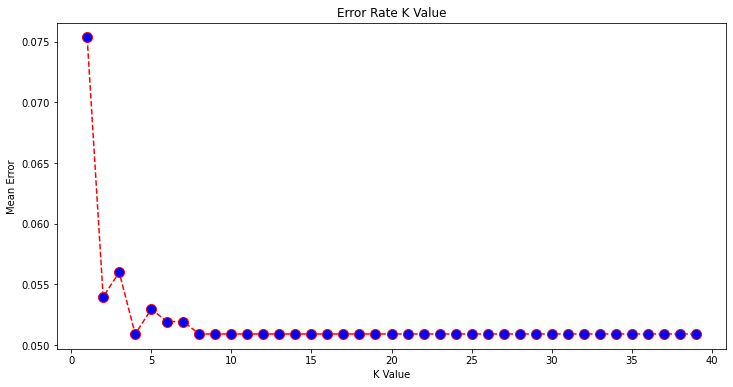

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
error2 = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
  knn.fit(X_train, Y_train)
  pred_i = knn.predict(X_test)
  error2.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

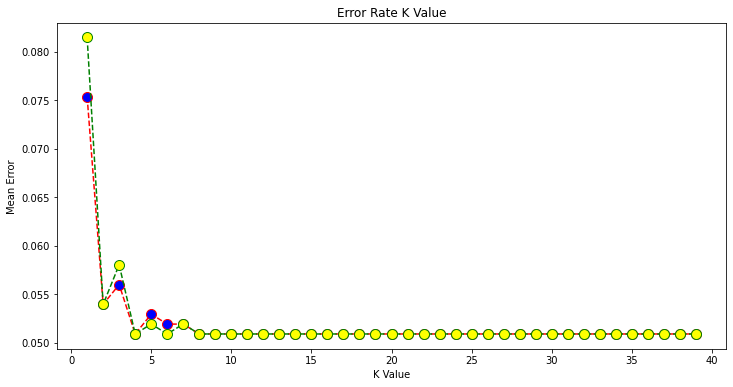

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.plot(range(1, 40), error2, color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


Dropping the id column, and using smote technique

In [ ]:
X = X.drop(['id'], axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

smote = SMOTE()
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


n_neighbors=5

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_balanced, Y_train_balanced)

y_pred = model.predict(X_test)

conf_matrix = pd.crosstab(Y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
conf_matrix

Predicted,0,1
Actual,,
0,700,232
1,35,15


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       932
           1       0.06      0.30      0.10        50

    accuracy                           0.73       982
   macro avg       0.51      0.53      0.47       982
weighted avg       0.91      0.73      0.80       982



n_neighbors=10

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_balanced, Y_train_balanced)

y_pred = model.predict(X_test)

conf_matrix = pd.crosstab(Y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
conf_matrix

Predicted,0,1
Actual,,
0,688,244
1,33,17


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       932
           1       0.07      0.34      0.11        50

    accuracy                           0.72       982
   macro avg       0.51      0.54      0.47       982
weighted avg       0.91      0.72      0.80       982



KNN Regression
--

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from math import sqrt

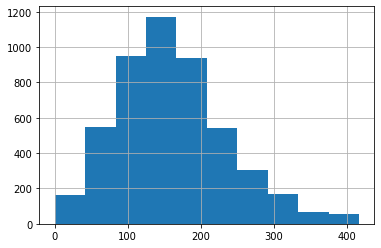

In [ ]:
# target column for regression -> bmi
df_encoded['bmi'].hist()

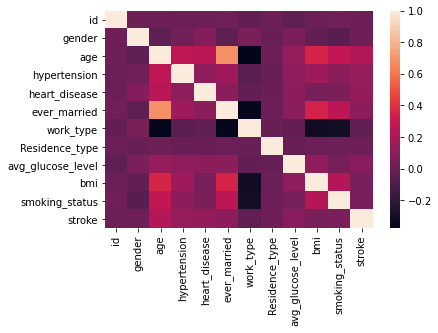

In [ ]:
sns.heatmap(df_encoded.corr())

In [ ]:
X = df_encoded.drop(['id', 'bmi'], axis=1)
y = df_encoded['bmi']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [ ]:
model = KNeighborsRegressor(n_neighbors=21)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

model.score(X_test, Y_test)

0.24731479500945855

In [ ]:
mean_squared_error(Y_test, y_pred)

4194.200592524858

In [ ]:
mean_absolute_error(Y_test, y_pred)

49.39583939482107

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

pred = model.predict(X)

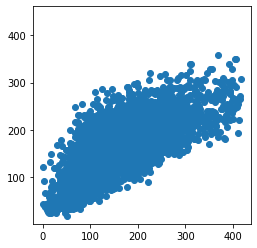

In [ ]:
plt.scatter(y, pred)
plt.axis('square')
plt.show()

In [ ]:
error = []
rmse = []
for i in range(1, 40):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, Y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(abs(pred_i - Y_test)))
  rmse.append(sqrt(mean_squared_error(pred_i, Y_test)))

Text(0, 0.5, 'Mean Error')

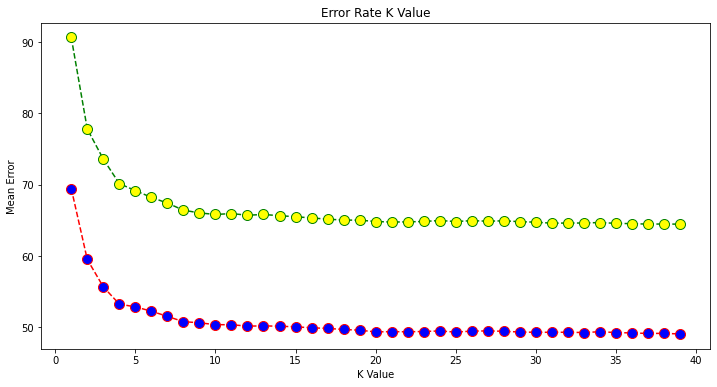

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.plot(range(1, 40), rmse, color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Searching for best hyperparameters for the KNeighborsRegressor() algorithm

In [ ]:
KNeighborsRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select an algorithm
algorithm = KNeighborsRegressor()

# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2, 3, 5, 6, 20, 35, 40], 'weights': ['uniform','distance'], 'metric': ['minkowski', 'manhattan', 'euclidean', 'chebyshev'], 'p': [2, 3, 5, 6, 8]}]

# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, scoring='r2')
grid.fit(X, y)

# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.24570102494491097
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                    weights='uniform')
{'metric': 'minkowski', 'n_neighbors': 40, 'p': 2, 'weights': 'uniform'}
